# The Most Probable Signals Of Automobile Price

### Explatory Data Analysis

### Contents

1.Introduction

2.The Goal of Analysis

3.General View of the Data

4.Data Cleaning

5.Exploring the Data

6.Feature Engineering

7.Results

8.Conclusions


### 1.Introduction
Assume you want to sell your car? But the problem is, you don’t know how much you should sell your car. But you also want to set the price reasonably so someone would want to purchase it.
As a data analyst we should ask various questions to solve the problem. As for the problem here, what were the features that affect the price of the car?

### 2.The Goal of Analysis
The main goal which kind of attributes may be more significant signal of car prices. We will not research the deepest point but we will get better understanding of the data.

### 3. General View of the Data
#### Variables
1. car_ID: continous from 1 to 205.
2. symboling: -3, -2, -1, 0, 1, 2, 3.
2. carCompany:
    alfa-romero, audi, bmw, chevrolet, dodge, honda,
    isuzu, jaguar, mazda, mercedes-benz, mercury,
    mitsubishi, nissan, peugot, plymouth, porsche,
    renault, saab, subaru, toyota, volkswagen, volvo

4. fueltype: diesel, gas.
5. aspiration: std, turbo.
6. doornumber: four, two.
7. carbody: hardtop, wagon, sedan, hatchback, convertible.
8. drivewheel: 4wd, fwd, rwd.
9. enginelocation: front, rear.
10. wheelbase: continuous from 86.6 to 120.9.
11. carlength: continuous from 141.1 to 208.1.
12. carwidth: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curbweight: continuous from 1488 to 4066.
15. enginetype: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. cylindernumber: eight, five, four, six, three, twelve, two.
17. enginesize: continuous from 61 to 326.
18. fuelsystem: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. boreratio: diameter of clinder, continuous from 2.54 to 3.94.
20. stroke: max lengt of that piston travels from TDC TO BDC continuous from 2.07 to 4.17.
21. compressionratio: total volume/ clearance volume continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peakrpm: peak measure of how fast a car’s engine, continuous from 4150 to 6600.
24. citympg: consumption of fuel in city(miles per gallon), continuous from 13 to 49.
25. highwaympg: consumption of fuel in highway(miles per gallon),continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

For more information visit the page https://www.kaggle.com/jenisam/logistic-regression-carsprice

#### Importing the useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
dfcar=pd.read_csv('../carPrice.csv',index_col=0)
dfcar.head()

,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Data is a combination of numerical and categorical variables. We must ensure the datatype before finding the right visualization method.

In [3]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
carCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

Some statistically meaningful values about data:

In [4]:
pd.options.display.float_format = '{:.3f}'.format
dfcar.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


### 4. Data Cleaning

We see below we have no nan values.

In [5]:
pd.concat([dfcar.isnull().sum(), 100 * dfcar.isnull().sum()/len(dfcar)], 
            axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
symboling,0,0.000
carCompany,0,0.000
fueltype,0,0.000
aspiration,0,0.000
doornumber,0,0.000
carbody,0,0.000
drivewheel,0,0.000
enginelocation,0,0.000
wheelbase,0,0.000
carlength,0,0.000


#### Get Dummies
This method converts categorical variable into dummy/indicator variables.

In [37]:
dfcar2 = dfcar.copy()
cols = ['fueltype','carCompany','aspiration','doornumber','carbody','drivewheel',
        'enginelocation','enginetype','cylindernumber','fuelsystem']
dfcar3 = pd.concat([dfcar2, pd.get_dummies(dfcar2[cols])], axis=1).drop(cols, axis = 1)

We have done the principal component analysis to see how much variance shared by less variables.

#### Get rid of the outliers

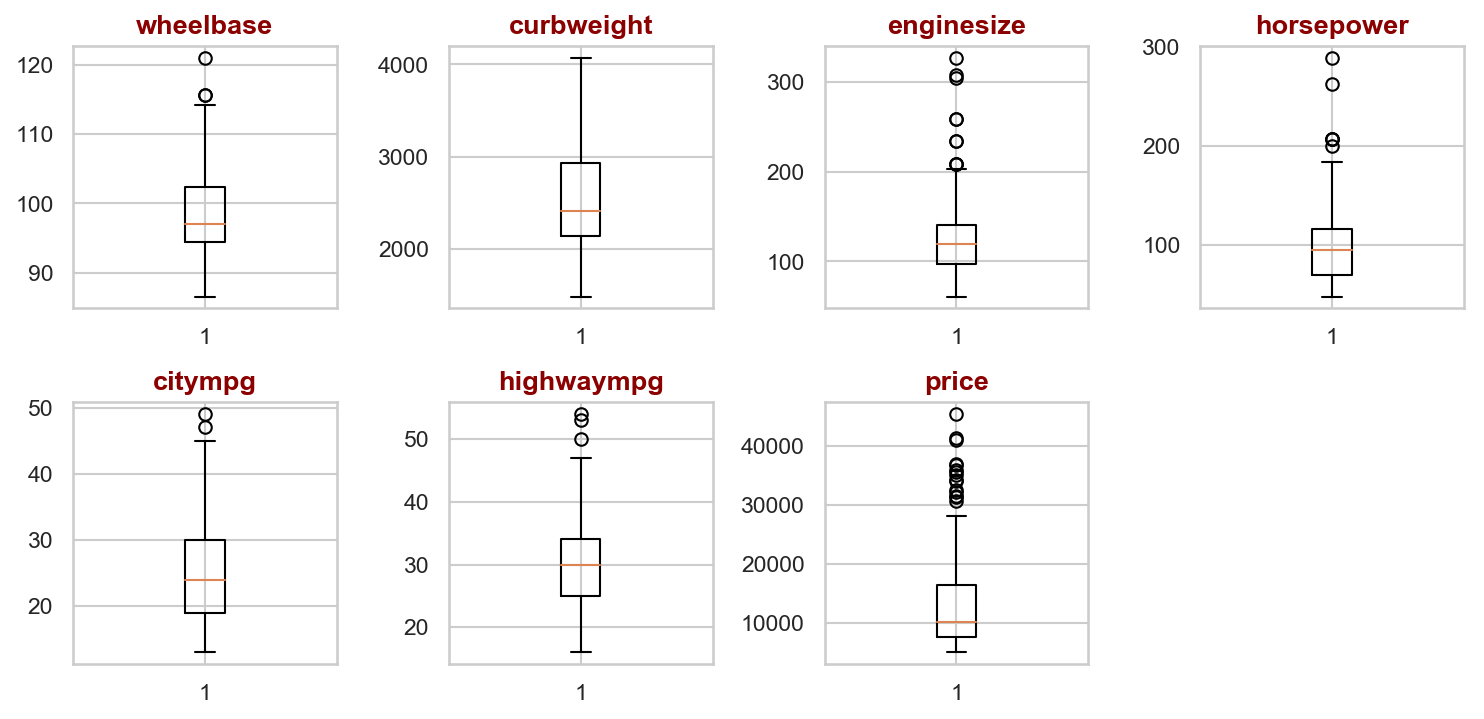

In [7]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=150)
fill_list=['wheelbase','curbweight','enginesize','horsepower','citympg','highwaympg','price']
for i,col in enumerate(fill_list):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfcar)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

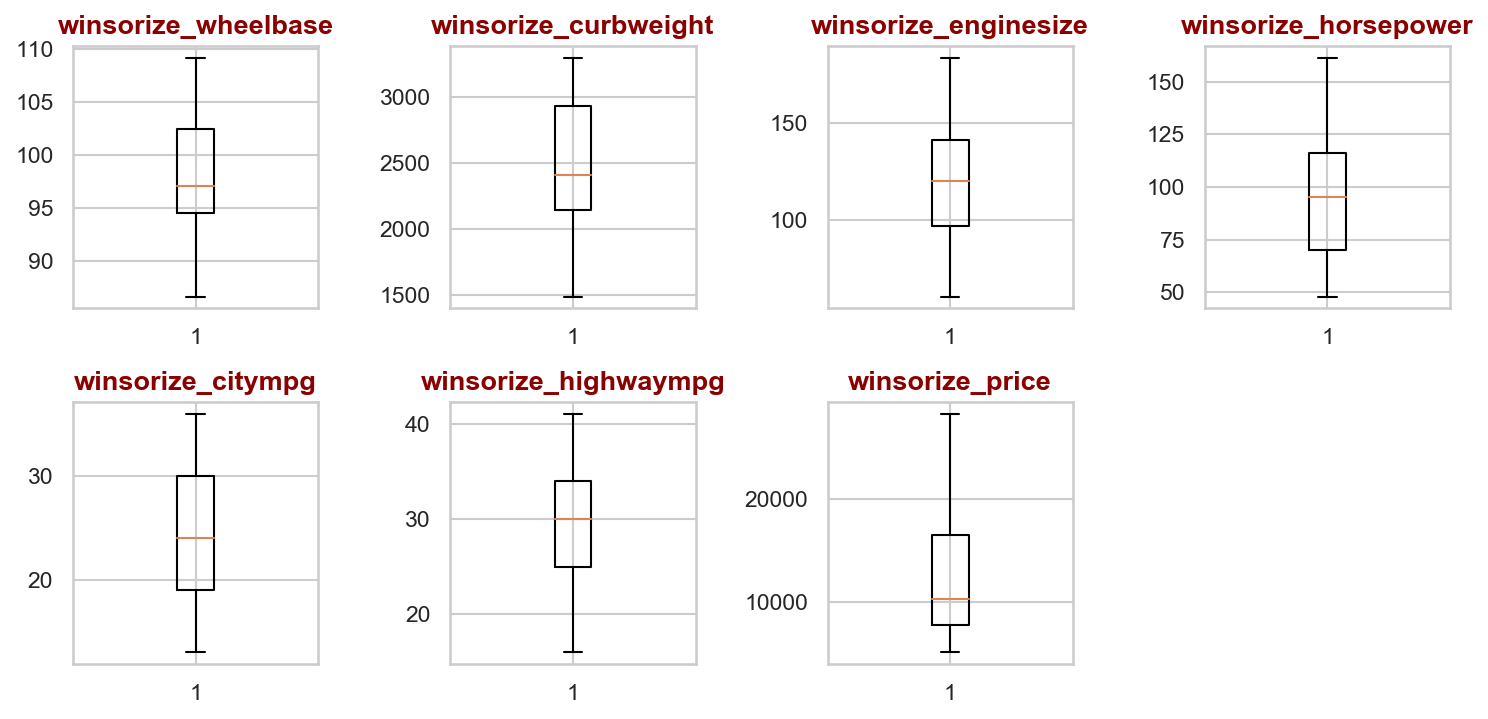

In [8]:
from scipy.stats.mstats import winsorize
dfcarw=pd.DataFrame()
for col in fill_list:
    dfcarw['winsorize_%s'%col]=winsorize(dfcar[col],(0,0.08))
plt.figure(figsize=(10,7),dpi=150)
for i,col in enumerate(dfcarw.columns):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfcarw)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

#### Conversion of the outliers
We should covert the data to log values in order to normalize the data.

In [49]:
from scipy.stats import zscore
esik_degerleri=pd.DataFrame(columns=['threshold_value','outliers_value','outliers_value_log'])
z_scores=zscore((dfcar['price']))
log_z_scores=zscore((np.log(dfcar['price'])))
for threshold in range(1,5):
    esik_degerleri=esik_degerleri.append({'threshold_value':threshold,
                                          'outliers_value':len(z_scores[z_scores>threshold]),
                                          'outliers_value_log':len(log_z_scores[log_z_scores>threshold])},
                                          ignore_index=True)
display(esik_degerleri)

,threshold_value,outliers_value,outliers_value_log
0,1,24,27
1,2,15,13
2,3,3,0
3,4,1,0


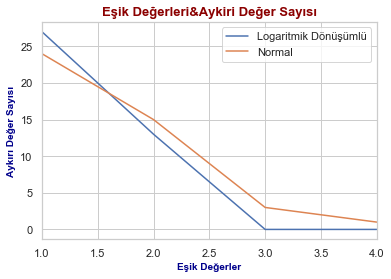

In [10]:
esik_degerleri.plot(x='esik_degeri',y=['aykiri_deger_sayisi_log','aykiri_deger_sayisi'])
plt.title('Eşik Değerleri&Aykiri Değer Sayısı',fontdict=baslik_font)
plt.xlabel('Eşik Değerler',fontdict=eksen_font)
plt.ylabel('Aykırı Değer Sayısı',fontdict=eksen_font)
plt.legend(('Logaritmik Dönüşümlü','Normal'))
plt.show()

### 5. Exploring the Data

### Let's look at distribution of the categorical variables for price.

### Cylindernumber vs Price

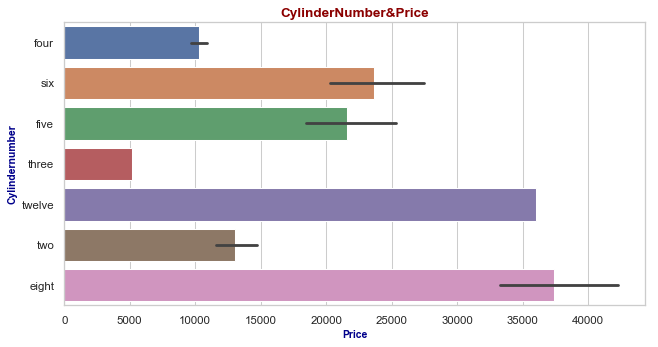

In [11]:
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(dfcar.price,dfcar.cylindernumber)
plt.title('CylinderNumber&Price',fontdict=baslik_font)
plt.xlabel('Price',fontdict=eksen_font)
plt.ylabel('Cylindernumber',fontdict=eksen_font)
plt.show()

In [12]:
numbers=dfcar.cylindernumber.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for cylindernumber",end='')
for i in range(0, len(numbers)):
    for j in range(i+1, len(numbers)):
        ttest = stats.ttest_ind(dfcar[dfcar["cylindernumber"]==numbers[i]]['price'], 
                                dfcar[dfcar["cylindernumber"]==numbers[j]]['price'])
        grup_1 = numbers[i]
        grup_2 = numbers[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:    
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                             "group_2" : grup_2 ,
                                             "statistics": istatistik , 
                                             "p_value" : p_degeri}, ignore_index=True)
display(karsilastirma)

Ttest for cylindernumber

,group_1,group_2,statistics,p_value
0,four,six,-12.64245,0.00000
1,four,five,-8.91183,0.00000
2,four,eight,-15.02224,0.00000
3,six,two,2.36100,0.02600
4,six,eight,-3.30303,0.00270
5,five,two,2.71334,0.01774
6,five,eight,-4.89458,0.00024
7,two,eight,-8.08431,0.00009


### Carbody vs Price

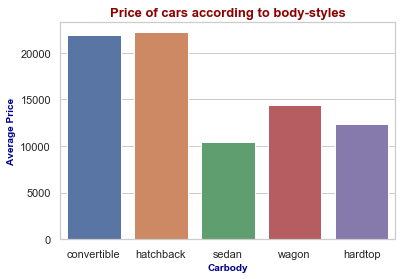

In [13]:
sns.barplot(dfcar['carbody'].unique(),dfcar.groupby(dfcar['carbody']).price.mean())
plt.title('Price of cars according to body-styles',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Carbody',fontdict=eksen_font)
plt.show()

In [14]:
bodies=dfcar.carbody.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for carbody",end='')
for i in range(0, len(bodies)):
    for j in range(i+1, len(bodies)):
        ttest = stats.ttest_ind(dfcar[dfcar["carbody"]==bodies[i]]['price'], 
                                dfcar[dfcar["carbody"]==bodies[j]]['price'])
        grup_1 = bodies[i]
        grup_2 = bodies[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:  
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                            "group_2" : grup_2 ,
                                            "statistics": istatistik , 
                                            "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for carbody

,group_1,group_2,statistics,p_value
0,convertible,hatchback,4.86661,0.00001
1,convertible,sedan,2.07872,0.04020
2,convertible,wagon,3.18255,0.00347
3,hatchback,sedan,-3.51075,0.00058
4,hatchback,hardtop,-4.92730,0.00000
5,sedan,hardtop,-2.36920,0.01971
6,wagon,hardtop,-2.93353,0.00625


### Drivewheel vs Price

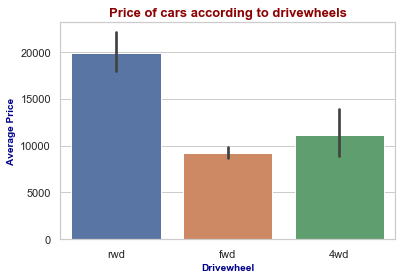

In [15]:
sns.barplot(dfcar.drivewheel,dfcar.price)
plt.title('Price of cars according to drivewheels',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Drivewheel',fontdict=eksen_font)
plt.show()

In [16]:
wheels=dfcar.drivewheel.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for drivewheels",end='')
for i in range(0, len(wheels)):
    for j in range(i+1, len(wheels)):
        ttest = stats.ttest_ind(dfcar[dfcar["drivewheel"]==wheels[i]]['price'], 
                                dfcar[dfcar["drivewheel"]==wheels[j]]['price'])
        grup_1 = wheels[i]
        grup_2 = wheels[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:  
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                            "group_2" : grup_2 ,
                                            "statistics": istatistik , 
                                            "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for drivewheels

,group_1,group_2,statistics,p_value
0,rwd,fwd,11.67001,0.00000
1,rwd,4wd,2.85807,0.00539


### CarSegment vs Price

In [17]:
def marka_grupla(marka):
    if dfcar[dfcar.carCompany == marka].price.mean()>=17000:
        return 'Lux'
    elif 10000<=dfcar[dfcar.carCompany==marka].price.mean()<17000:
        return 'Medium'
    else:
        return 'Low'
dfcar['CarSegment'] = dfcar.carCompany.apply(marka_grupla)

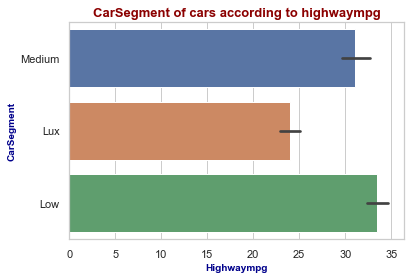

In [18]:
sns.barplot(dfcar.highwaympg,dfcar.CarSegment)
plt.title('CarSegment of cars according to highwaympg',fontdict=baslik_font)
plt.ylabel('CarSegment',fontdict=eksen_font)
plt.xlabel('Highwaympg',fontdict=eksen_font)
plt.show()

In [19]:
segment=dfcar.CarSegment.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for CarSegment",end='')
for i in range(0, len(segment)):
    for j in range(i+1, len(segment)):
        ttest = stats.ttest_ind(dfcar[dfcar["CarSegment"]==segment[i]]['highwaympg'], 
                                dfcar[dfcar["CarSegment"]==segment[j]]['highwaympg'])
        grup_1 = segment[i]
        grup_2 = segment[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:  
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                            "group_2" : grup_2 ,
                                            "statistics": istatistik , 
                                            "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for CarSegment

,group_1,group_2,statistics,p_value
0,Medium,Lux,6.28694,0.00000
1,Medium,Low,-2.33023,0.02103
2,Lux,Low,-9.24748,0.00000


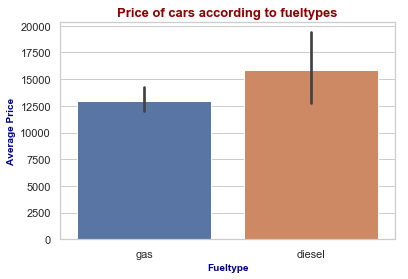

In [20]:
sns.barplot(dfcar['fueltype'],dfcar.price)
plt.title('Price of cars according to fueltypes',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Fueltype',fontdict=eksen_font)
plt.show()

In [21]:
types=dfcar.fueltype.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for fueltype",end='')
for i in range(0, len(types)):
    for j in range(i+1, len(types)):
        ttest = stats.ttest_ind(dfcar[dfcar["fueltype"]==types[i]]['price'], 
                                dfcar[dfcar["fueltype"]==types[j]]['price'])
        grup_1 = types[i]
        grup_2 = types[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]  
        karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                                "group_2" : grup_2 ,
                                                "statistics": istatistik , 
                                                "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for fueltype

,group_1,group_2,statistics,p_value
0,gas,diesel,-1.51418,0.13154


#### In order to start understanding the (linear) relationship between an individual numerical variable and the price. This can be done by the scatterplot plus the fitted regression line for the data.

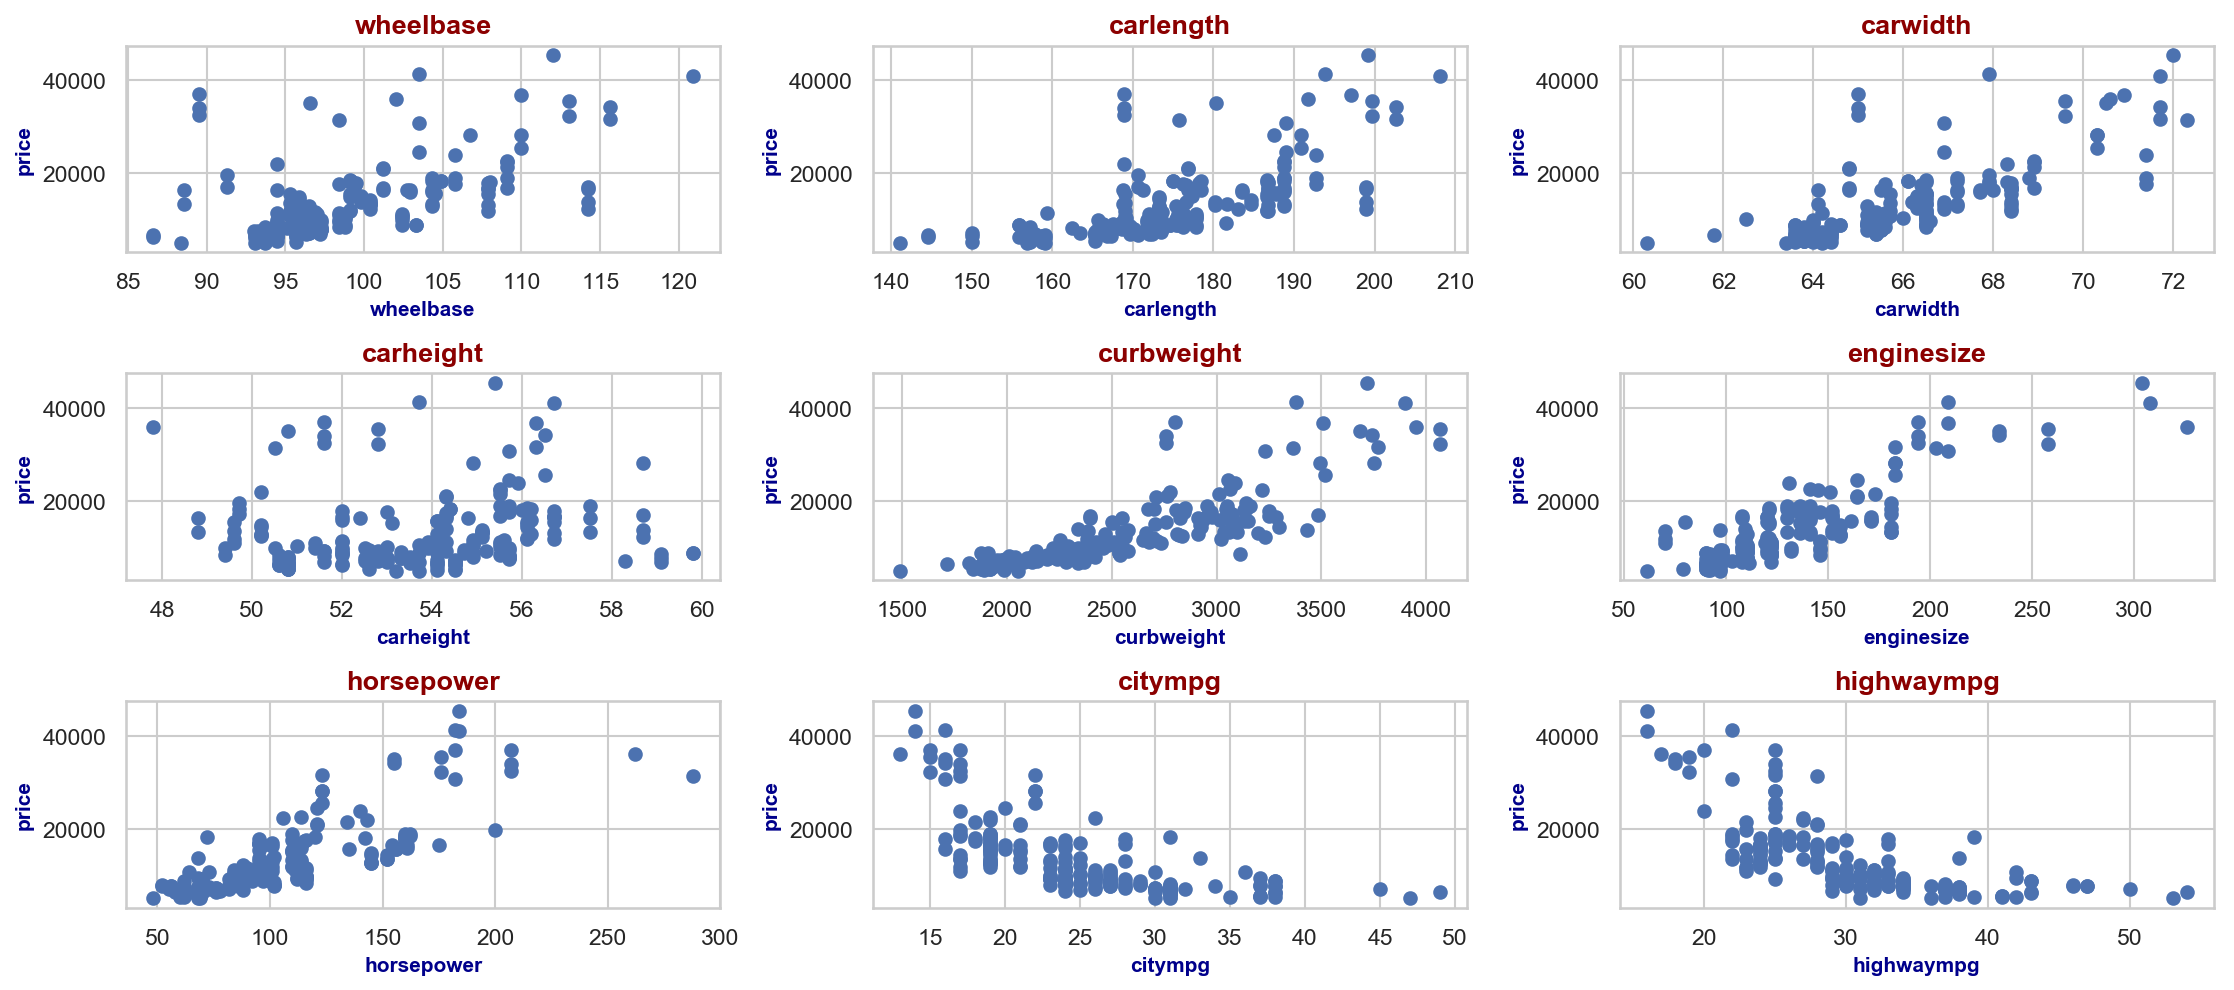

In [22]:
plt.figure(figsize=(15,15),dpi=150)
fill_list2=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','citympg','highwaympg']
for i,col in enumerate(fill_list2):
    plt.subplot(7,3,i+1)
    plt.scatter(col,'price', data=dfcar)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('price',fontdict=eksen_font)
plt.tight_layout()
plt.show()

#### We should make log conversion and see again the correlation.

In [23]:
fill_list2=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','citympg',
            'highwaympg','price']
dfcarlog=pd.DataFrame()
for col in fill_list2:
    dfcarlog['log_%s'%col]=np.log(dfcar[col])

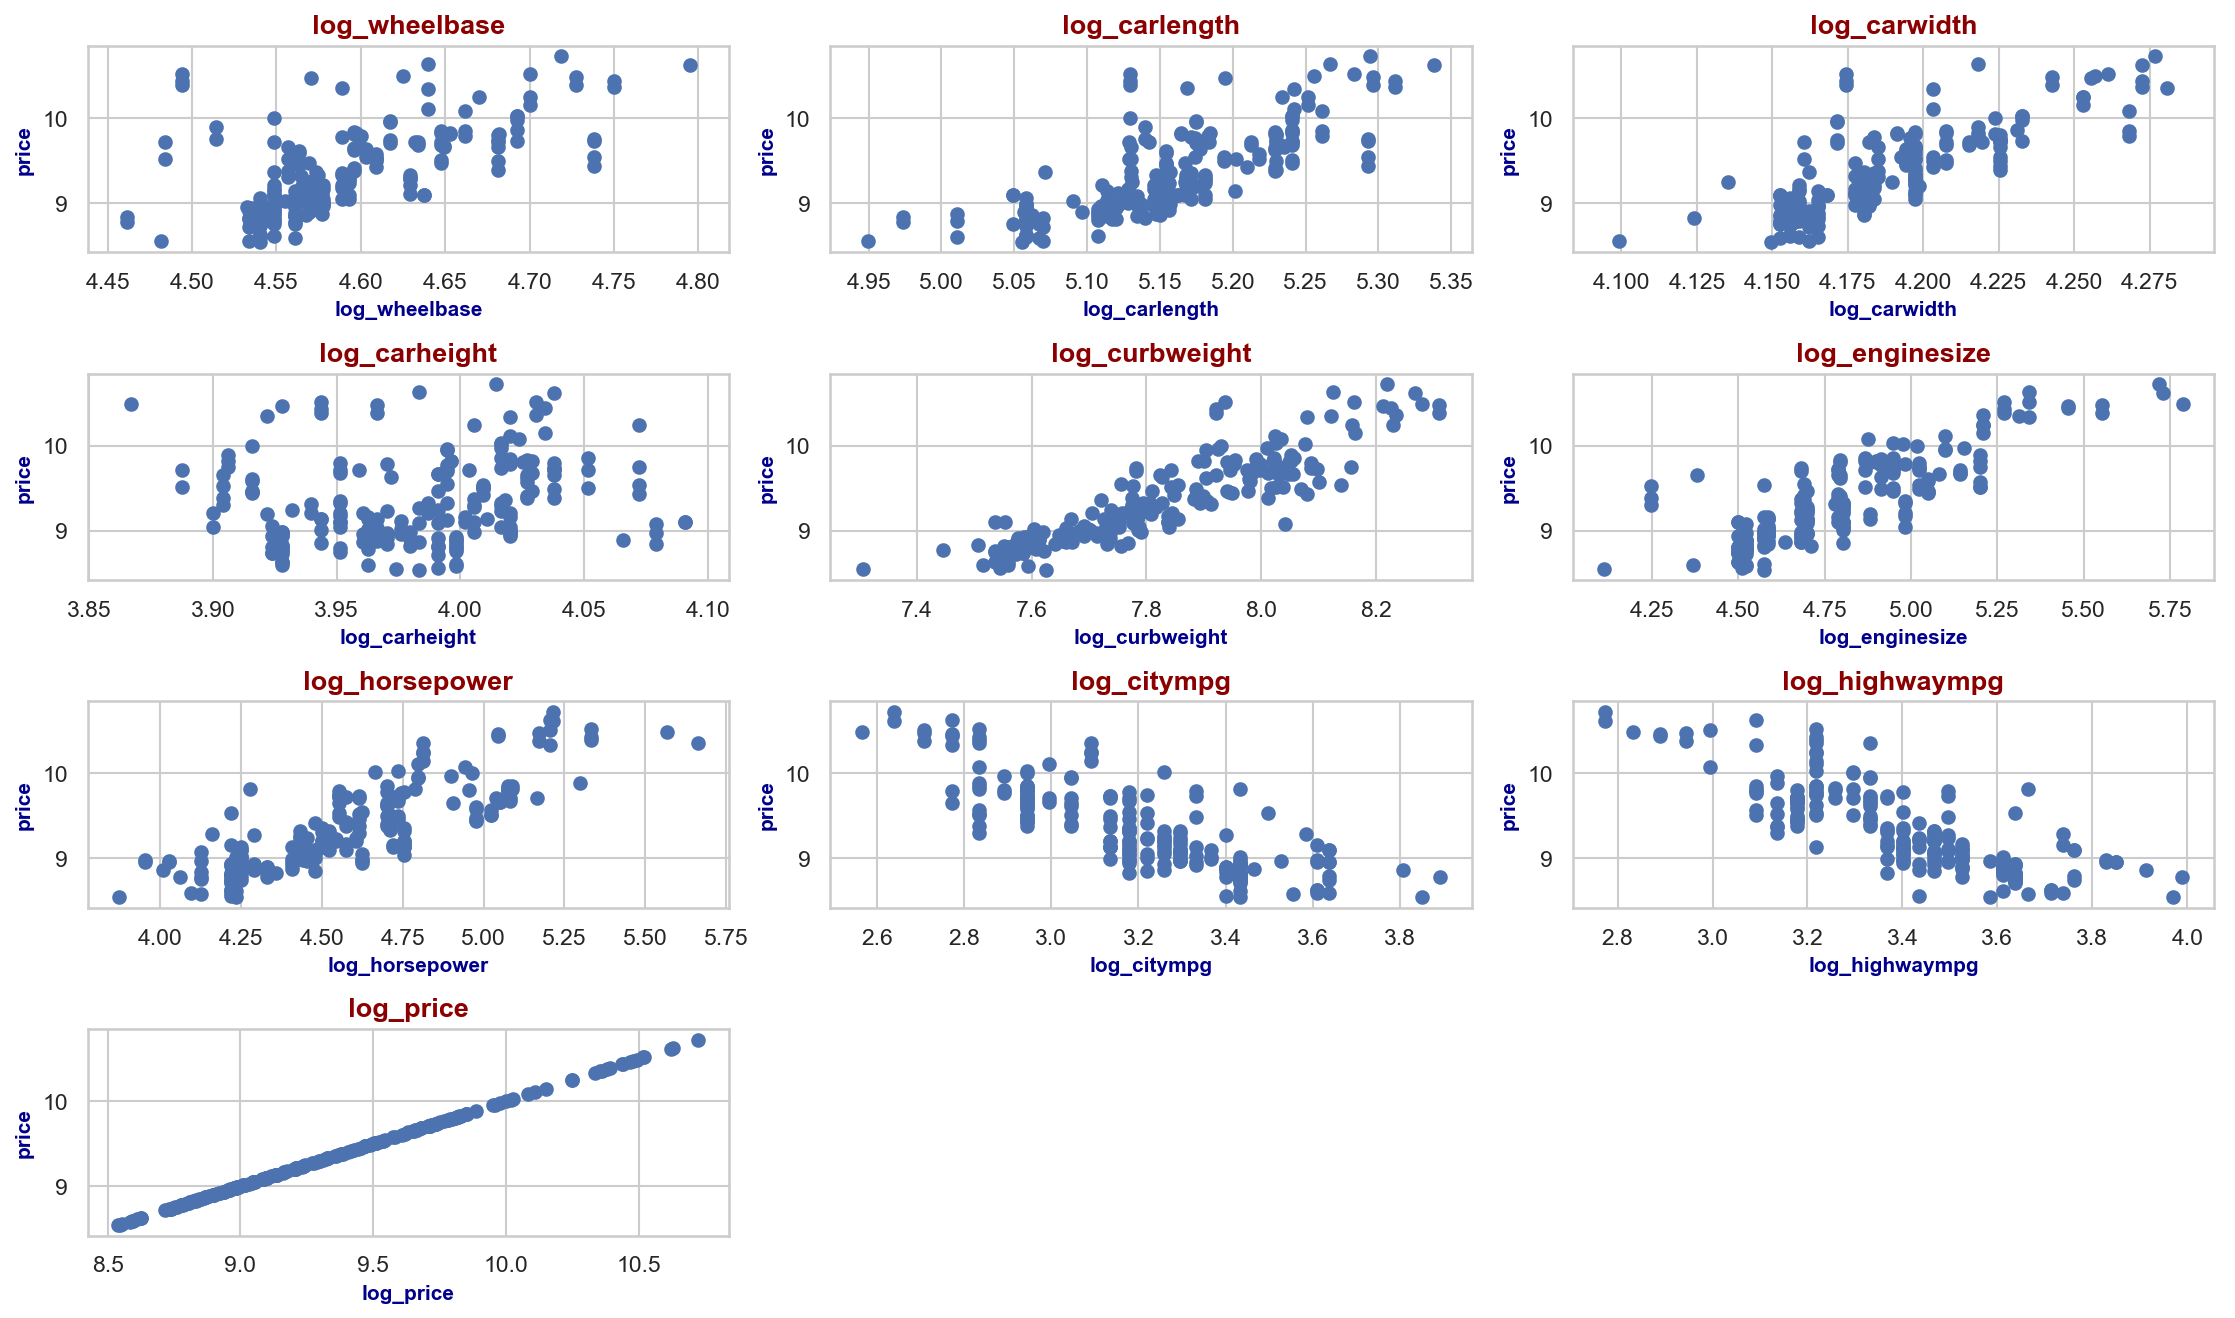

In [24]:
plt.figure(figsize=(15,15),dpi=150)
for i,col in enumerate(dfcarlog.columns):
    plt.subplot(7,3,i+1)
    plt.scatter(col,'log_price', data=dfcarlog)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('price',fontdict=eksen_font)
plt.tight_layout()
plt.show()

Calculate the correlation between variables of type "int64" or "float64" using the method "corr":

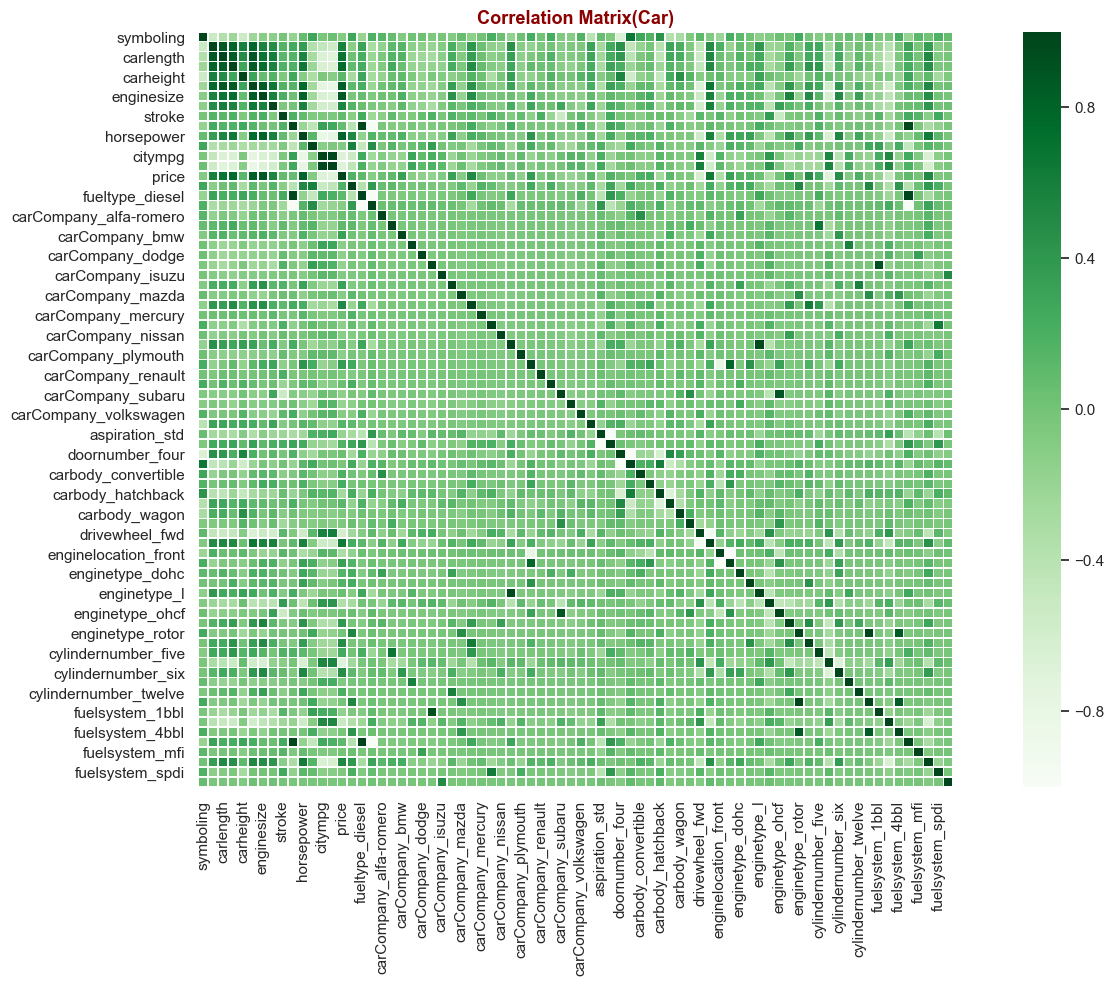

In [48]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dfcar3.corr(),square=True,annot=False,
            linewidths=.5,vmin=-1,vmax=1,cmap='Greens')
plt.title('Correlation Matrix(Car)',fontdict=baslik_font)
display()

In [47]:
high_corr=dfcar3.corr().price.abs().sort_values(ascending=False).index[0:10]
dfcar3[high_corr].corr().price

price                  1.00000
enginesize             0.87414
curbweight             0.83530
horsepower             0.80814
carwidth               0.75933
cylindernumber_four   -0.69776
highwaympg            -0.69760
citympg               -0.68575
carlength              0.68292
drivewheel_rwd         0.63896
Name: price, dtype: float64

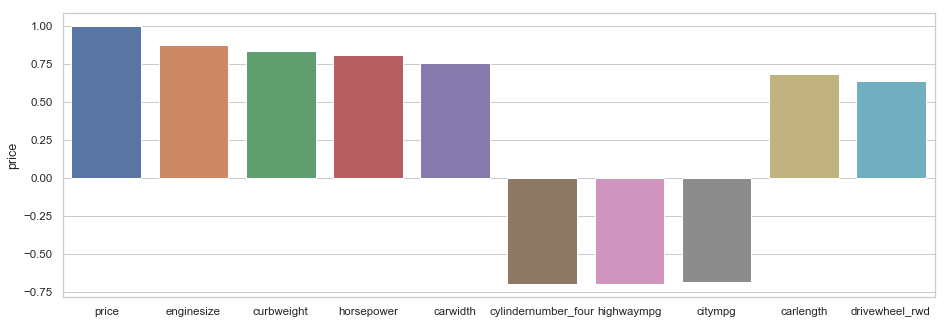

In [27]:
plt.figure(figsize=(15,5),dpi=75)
sns.barplot(x=yuksek_korr,y=dfcar3[yuksek_korr].corr().price)
plt.show()

In [58]:
import plotly.express as px
px.scatter(x = dfcar.citympg, y=dfcar.price, color = dfcar.carCompany)

In [29]:
dfcar[['price','citympg']].corr()

,price,citympg
price,1.00000,-0.68575
citympg,-0.68575,1.00000


### 6.Feature Engineering

#### Horsepower/enginesize ratio gives maximum power. For this reason, we will examine probable effect of maximum power on price.

In [59]:
import plotly.express as px
px.scatter(x = dfcar.horsepower/dfcar.enginesize, y=dfcar.price, color = dfcar.carCompany)

Unfortunately, there is no good correlation between price and maxpower.

In [31]:
dfcar['maxpower']=dfcar.horsepower/dfcar.enginesize
dfcar[['price','maxpower']].corr()

,price,maxpower
price,1.00000,0.17195
maxpower,0.17195,1.00000


### T-test

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

In [32]:
pd.options.display.float_format='{:.3f}'.format
pe=stats.ttest_ind(dfcar['price'],dfcar['enginesize'])
ph=stats.ttest_ind(dfcar['price'],dfcar['horsepower'])
py=stats.ttest_ind(dfcar['price'],dfcar['citympg'])
pc=stats.ttest_ind(dfcar['price'],dfcar['carwidth'])
pm=stats.ttest_ind(dfcar['price'],dfcar['maxpower'])
print('PE {}\nPH {}\nPY {}\nPC {}\nPM {}'.format(pe,ph,py,pc,pm))

PE Ttest_indResult(statistic=23.56708628315423, pvalue=3.9137381754434676e-78)
PH Ttest_indResult(statistic=23.607962483689974, pvalue=2.600885184349351e-78)
PY Ttest_indResult(statistic=23.749645919160496, pvalue=6.314787574210729e-79)
PC Ttest_indResult(statistic=23.67673045260602, pvalue=1.3081691754850956e-78)
PM Ttest_indResult(statistic=23.79337911485808, pvalue=4.0805778962409194e-79)


T-test shows us these are all statistically significant, p-value is lower than 0.05

#### We can use Jarque-Bera and Normal tests to see if they follow the normal distribution.

In [46]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
pd.options.display.float_format='{:.5f}'.format
ozellikler=['curbweight','enginesize','horsepower']
dagilim_testleri = pd.DataFrame(columns=['attribute', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(dfcar[ozellik]))
    norm_stats = normaltest(np.log(dfcar[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"attribute": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,attribute,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,curbweight,5.20419,0.07412,7.07718,0.02905
1,enginesize,32.57522,0.00000,25.99676,0.00000
2,horsepower,8.56348,0.01382,8.25004,0.01616


If the p-value is smaller than 0.05, this shows that variables have not normal distribution.

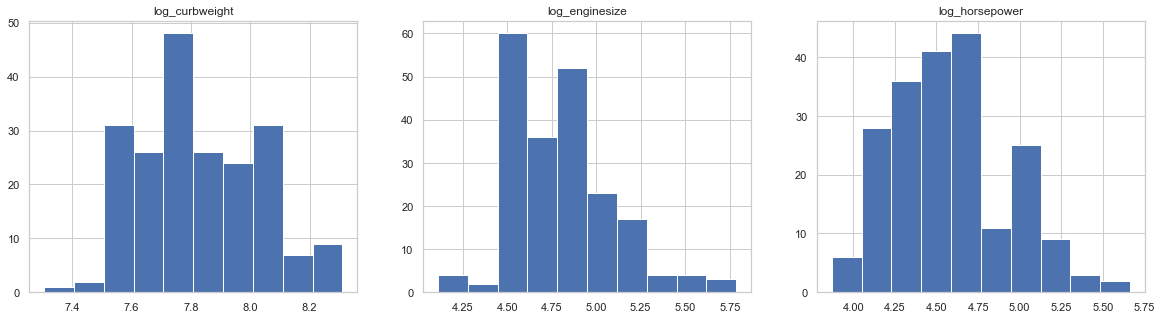

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(np.log(dfcar.curbweight))
plt.title('log_curbweight')
plt.subplot(132)
plt.hist(np.log(dfcar.enginesize))
plt.title('log_enginesize')
plt.subplot(133)
plt.hist(np.log(dfcar.horsepower))
plt.title('log_horsepower')
plt.show()

### PCA(Principal Component Analysis)

In [35]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

[63.81 35.98  0.16]


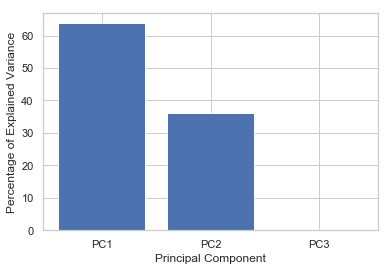

In [38]:
X=dfcar3.copy()
X.drop(columns=['price','CarSegment'],inplace=True)
pca=PCA(n_components=3)
dfcar_pca = pca.fit_transform(X)
components= np.round(pca.explained_variance_ratio_*100,decimals=2) 
labels = ['PC1','PC2','PC3']
plt.bar(x=range(1,len(components)+1), height=components, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
print (components)
plt.show()

Good result. The first principal component shares 63.8% of variance.

### 7.Results
Now, we are done with the our analysis. We understood the data, classified variables, plotted graphs, made some tests and tried to achieve what has impact on our target variables. We have got some results;

-Enginesize,curbweight,horsepower seem like a pretty good predictor of price.

-As we examined our categorical variables, price is higher than others for rwd(drivewheel), gas(fueltype), hatchback(carbody), cylindernumber(eight).

-We could not detect any relation between peakrpm(how many times each piston goes up and down in its cylinder per minute) and price.

-Finaly,Using the PCA module in python, we have found out the first principal component represents the most of variance, 63.8%.

### 8.Conclusion

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price.